#  Task 6.4 - Machine Learning:  Linear Regression


This script contains the following:

####  1.  Importing libraries and data
####  2.  Reviewing dataframe and cleaning
####  3.  Creating a new dataframe for regression testing
####  4.  Data prep for regression analysis
####  5.  Regression Analysis with Ages 40-59
####  6. Comparing how the regression fits the training set

Bonus: Regression analysis with different age group

    - Creating a new dataframe for age group 0-18
    - Data prep for regression analysis
    - Regression analysis for ages 0-18
    - Comparing how the regression fits the training set. 
#### 7.  Exporting data

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Original Data\2019-2020-homeless-ip-and-ed-by-facility.csv', index_col=False)

In [4]:
df

,EncounterType,HospitalCounty,OSHPD_ID,FacilityName,System,Ownership,Urban_Rural,Teaching,LicensedBedSize,PrimaryCareShortageArea,MentalHealthShortageArea,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters,Percent
0,Inpatient Hospitalizations,Alameda,10735,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,0 to 18,0,288,0.0
1,Inpatient Hospitalizations,Alameda,10735,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,19 to 39,42,288,14.6
2,Inpatient Hospitalizations,Alameda,10735,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,40 to 59,147,288,51.0
3,Inpatient Hospitalizations,Alameda,10735,Alameda Hospital,Alameda Health System,Government,Urban,Non-Teaching,100-199,No,No,Homeless,Age,60+,99,288,34.4
4,Inpatient Hospitalizations,Alameda,10739,Alta Bates Summit Medical Center-Alta Bates Ca...,Sutter Health,Non-Profit,Urban,Non-Teaching,300-399,No,No,Homeless,Age,0 to 18,5,846,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25444,ED Visits,Yuba,580996,Adventist Health and Rideout,Adventist Health Systems,Non-Profit,Rural/Frontier,Non-Teaching,200-299,Yes,Yes,Non-Homeless,Payer,Medi-Cal,56968,107122,53.2
25445,ED Visits,Yuba,580996,Adventist Health and Rideout,Adventist Health Systems,Non-Profit,Rural/Frontier,Non-Teaching,200-299,Yes,Yes,Non-Homeless,Payer,Medicare,19806,107122,18.5
25446,ED Visits,Yuba,580996,Adventist Health and Rideout,Adventist Health Systems,Non-Profit,Rural/Frontier,Non-Teaching,200-299,Yes,Yes,Non-Homeless,Payer,Other Payer,4813,107122,4.5
25447,ED Visits,Yuba,580996,Adventist Health and Rideout,Adventist Health Systems,Non-Profit,Rural/Frontier,Non-Teaching,200-299,Yes,Yes,Non-Homeless,Payer,Private Coverage,16289,107122,15.2


## Reviewing dataframe and cleaning

In [6]:
df.shape

(25449, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25449 entries, 0 to 25448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EncounterType             25449 non-null  object 
 1   HospitalCounty            25449 non-null  object 
 2   OSHPD_ID                  25449 non-null  int64  
 3   FacilityName              25449 non-null  object 
 4   System                    16609 non-null  object 
 5   Ownership                 25449 non-null  object 
 6   Urban_Rural               25449 non-null  object 
 7   Teaching                  25449 non-null  object 
 8   LicensedBedSize           25449 non-null  object 
 9   PrimaryCareShortageArea   25449 non-null  object 
 10  MentalHealthShortageArea  25449 non-null  object 
 11  HomelessIndicator         25449 non-null  object 
 12  Demographic               25449 non-null  object 
 13  DemographicValue          25449 non-null  object 
 14  Encoun

In [8]:
# checking for duplicates
df_dups = df[df.duplicated()]  # - no duplicates

In [9]:
df_dups.shape

(0, 17)

In [10]:
# checking for missing values
df.isnull().sum()  # the 8840 is okay for system as this column is not required for this analysis. 

EncounterType                  0
HospitalCounty                 0
OSHPD_ID                       0
FacilityName                   0
System                      8840
Ownership                      0
Urban_Rural                    0
Teaching                       0
LicensedBedSize                0
PrimaryCareShortageArea        0
MentalHealthShortageArea       0
HomelessIndicator              0
Demographic                    0
DemographicValue               0
Encounters                     0
TotalEncounters                0
Percent                        0
dtype: int64

## Creating new dataframe for regression testing

In [12]:
# create a new dataframe with necessary columns
df2 = df[['HomelessIndicator', 'Demographic', 'DemographicValue', 'Encounters', 'TotalEncounters']]

In [13]:
df2

,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
0,Homeless,Age,0 to 18,0,288
1,Homeless,Age,19 to 39,42,288
2,Homeless,Age,40 to 59,147,288
3,Homeless,Age,60+,99,288
4,Homeless,Age,0 to 18,5,846
...,...,...,...,...,...
25444,Non-Homeless,Payer,Medi-Cal,56968,107122
25445,Non-Homeless,Payer,Medicare,19806,107122
25446,Non-Homeless,Payer,Other Payer,4813,107122
25447,Non-Homeless,Payer,Private Coverage,16289,107122


In [14]:
# updating dataframe to have only the variables needed for this analysis.
# Age Demographic with Demographic Value of  40-59
df3 = df2.loc[(df2.Demographic == "Age") & (df2.DemographicValue == "40 to 59")]

In [15]:
df3

,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
2,Homeless,Age,40 to 59,147,288
6,Homeless,Age,40 to 59,379,846
10,Homeless,Age,40 to 59,0,63
14,Homeless,Age,40 to 59,18,52
18,Homeless,Age,40 to 59,1818,4138
...,...,...,...,...,...
25146,Non-Homeless,Age,40 to 59,325,1625
25218,Homeless,Age,40 to 59,2,6
25320,Non-Homeless,Age,40 to 59,247,865
25347,Non-Homeless,Age,40 to 59,100,1431


In [16]:
# create a dataframe for just homeless encounters.  
# Please note that total encounters encompasses the total homeless encounters of the Age demographic. 
df4 = df3[df3.HomelessIndicator.isin(["Homeless"])]

In [17]:
df4

,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
2,Homeless,Age,40 to 59,147,288
6,Homeless,Age,40 to 59,379,846
10,Homeless,Age,40 to 59,0,63
14,Homeless,Age,40 to 59,18,52
18,Homeless,Age,40 to 59,1818,4138
...,...,...,...,...,...
24577,Homeless,Age,40 to 59,1,6
24766,Homeless,Age,40 to 59,52,96
24920,Homeless,Age,40 to 59,2,4
25129,Homeless,Age,40 to 59,29,64


## Data prep for regression analysis

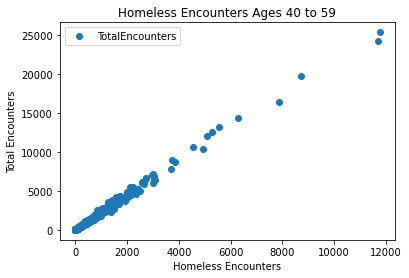

In [18]:
# create a scatterpllot using matplot lib for another look at how the chose variables plot against each other. 

df4.plot(x = 'Encounters', y='TotalEncounters', style='o') # the style option creates a scatterplot; without it we only have lines. 
plt.title('Homeless Encounters Ages 40 to 59')
plt.xlabel('Homeless Encounters')
plt.ylabel('Total Encounters')
plt.show()

In [19]:
# reshape the variables into numpy arrays and put them into separate objects. 

X = df4['Encounters'].values.reshape(-1,1)
y = df4['TotalEncounters'].values.reshape(-1,1)

In [20]:
X

array([[  147],
       [  379],
       [    0],
       [   18],
       [ 1818],
       [  509],
       [  116],
       [  174],
       [  216],
       [  105],
       [   29],
       [  209],
       [  361],
       [   55],
       [    4],
       [  293],
       [  512],
       [  116],
       [  478],
       [  256],
       [  281],
       [   23],
       [  379],
       [   13],
       [   52],
       [   47],
       [  115],
       [   91],
       [ 1876],
       [  314],
       [   16],
       [   33],
       [  458],
       [  117],
       [   27],
       [   11],
       [  234],
       [  299],
       [    1],
       [  223],
       [  153],
       [   66],
       [   37],
       [   70],
       [  267],
       [    2],
       [  681],
       [  244],
       [  256],
       [  631],
       [ 1527],
       [  588],
       [    0],
       [ 1282],
       [    0],
       [    9],
       [  101],
       [   51],
       [  457],
       [   80],
       [  347],
       [  182],
       [

In [21]:
y

array([[  288],
       [  846],
       [   63],
       [   52],
       [ 4138],
       [ 1045],
       [  265],
       [  337],
       [  671],
       [  225],
       [  106],
       [  451],
       [  710],
       [   95],
       [   13],
       [  680],
       [ 1127],
       [  341],
       [ 1075],
       [  475],
       [  592],
       [   41],
       [  812],
       [   34],
       [   79],
       [   89],
       [  243],
       [  152],
       [ 4099],
       [  615],
       [   47],
       [   70],
       [  990],
       [  237],
       [   58],
       [   34],
       [  474],
       [  741],
       [    8],
       [  495],
       [  308],
       [  148],
       [  109],
       [  113],
       [  556],
       [    5],
       [ 1294],
       [  503],
       [  548],
       [ 1243],
       [ 3094],
       [ 1273],
       [    2],
       [ 3633],
       [   29],
       [   16],
       [  254],
       [   90],
       [  801],
       [  220],
       [  951],
       [  375],
       [

In [22]:
# split data into training set and test set
# X is the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis with Ages 40-59

In [23]:
# create a regression object

regression = LinearRegression() # this is the regression object that we will fit onto the training set

In [24]:
# fit the regression to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

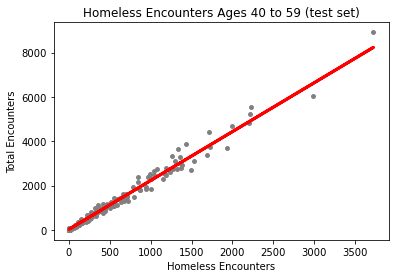

In [26]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s=15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Homeless Encounters Ages 40 to 59 (test set)')
plot_test.xlabel('Homeless Encounters')
plot_test.ylabel('Total Encounters')
plot_test.show()

- Analysis on visualization: The regression line fits the data very closely, and I would suspect that there is a strong positive coefficient that is close to 1.  

In [27]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # this is the mean squared error 
r2 = r2_score(y_test, y_predicted) # this is the R2 score

In [28]:
# print the model summary statistics.  This is where we will evaluate the performance of the model. 
print('Slope:' ,regression.coef_)
print('Mean Squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[2.2043555]]
Mean Squared error:  30138.861243089308
R2 score:  0.981892053923099


In [29]:
y_predicted

array([[ 307.09188808],
       [2570.96499027],
       [  35.95616114],
       [  99.88247074],
       [  49.18229416],
       [  55.79536067],
       [  46.97793866],
       [ 108.69989276],
       [  51.38664967],
       [ 227.73508995],
       [ 364.40513118],
       [  77.83891571],
       [  46.97793866],
       [ 289.45704405],
       [ 249.77864499],
       [ 185.85233538],
       [2654.73049941],
       [ 986.03338319],
       [ 556.18405999],
       [ 168.21749136],
       [1909.65833919],
       [3739.27340718],
       [ 853.77205297],
       [ 366.60948668],
       [ 551.77534898],
       [2809.03538466],
       [1138.13391294],
       [ 666.40183517],
       [3086.78417811],
       [4892.15133556],
       [ 503.2795279 ],
       [1254.96475463],
       [2650.3217884 ],
       [ 485.64468387],
       [ 320.3180211 ],
       [ 216.71331244],
       [1532.71354808],
       [ 124.13038128],
       [ 282.84397754],
       [  46.97793866],
       [ 988.23773869],
       [ 862.589

In [30]:
# creating a dataframe that compares the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,272,307.091888
1,2283,2570.964990
2,13,35.956161
3,70,99.882471
4,30,49.182294
5,34,55.795361
6,16,46.977939
7,88,108.699893
8,32,51.386650
9,152,227.735090


## Comparing how the regression fits the training set

In [31]:
# Predict the training set
y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' , regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.2043555]]
Mean squared error:  34330.96339790462
R2 score:  0.9949416598816624


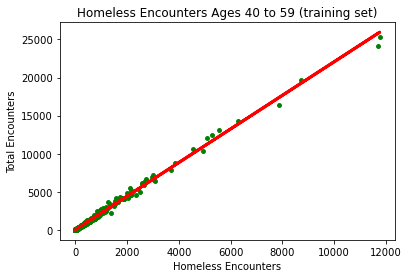

In [34]:
# visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_test.title('Homeless Encounters Ages 40 to 59 (training set)')
plot_test.xlabel('Homeless Encounters')
plot_test.ylabel('Total Encounters')
plot_test.show()

- Analysis on training set:  This line matches up very closely with the data!  We can tell there is a strong correlation between the Homeless Encounters ages 40-59 compared to the other ages.  

## Bonus:  Regression Analysis with a different age group

-There is a strong correlation between between ages 40-59 and the total homeless population.  Let's see if there is a strong correlation with the age group 0-18.

#### Creating new dataframe for age group 0-18

In [35]:
# revisiting old dataframe with necessary columns
df3

,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
2,Homeless,Age,40 to 59,147,288
6,Homeless,Age,40 to 59,379,846
10,Homeless,Age,40 to 59,0,63
14,Homeless,Age,40 to 59,18,52
18,Homeless,Age,40 to 59,1818,4138
...,...,...,...,...,...
25146,Non-Homeless,Age,40 to 59,325,1625
25218,Homeless,Age,40 to 59,2,6
25320,Non-Homeless,Age,40 to 59,247,865
25347,Non-Homeless,Age,40 to 59,100,1431


In [36]:
# updating dataframe to have only the variables needed for this analysis.
# Age Demographic with Demographic Value of  0-18
bonus1 = df2.loc[(df2.Demographic == "Age") & (df2.DemographicValue == "0 to 18")]

In [37]:
bonus1

,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
0,Homeless,Age,0 to 18,0,288
4,Homeless,Age,0 to 18,5,846
8,Homeless,Age,0 to 18,58,63
12,Homeless,Age,0 to 18,1,52
16,Homeless,Age,0 to 18,29,4138
...,...,...,...,...,...
25144,Non-Homeless,Age,0 to 18,1,1625
25216,Homeless,Age,0 to 18,0,6
25298,Non-Homeless,Age,0 to 18,0,865
25345,Non-Homeless,Age,0 to 18,0,1431


In [38]:
# creating a dataframe for just homeless encounters. 
# total encounters is the number of encounters per Demographic variable. 
bonus2 = bonus1[bonus1.HomelessIndicator.isin(["Homeless"])]

In [39]:
bonus2

,HomelessIndicator,Demographic,DemographicValue,Encounters,TotalEncounters
0,Homeless,Age,0 to 18,0,288
4,Homeless,Age,0 to 18,5,846
8,Homeless,Age,0 to 18,58,63
12,Homeless,Age,0 to 18,1,52
16,Homeless,Age,0 to 18,29,4138
...,...,...,...,...,...
24575,Homeless,Age,0 to 18,0,6
24764,Homeless,Age,0 to 18,0,96
24898,Homeless,Age,0 to 18,0,4
25127,Homeless,Age,0 to 18,1,64


#### Data prep for regression analysis

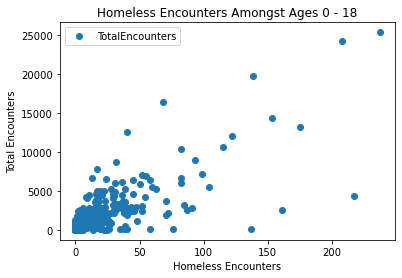

In [40]:
# create scatterplot
bonus2.plot(x = 'Encounters', y='TotalEncounters', style='o')
 # the style option creates a scatterplot; without it we only have lines.
plt.title('Homeless Encounters Amongst Ages 0 - 18')
plt.xlabel('Homeless Encounters')
plt.ylabel('Total Encounters')
plt.show()


In [41]:
# reshape the variables in a numpy array. 
X = bonus2['Encounters'].values.reshape(-1,1)
y = bonus2['TotalEncounters'].values.reshape(-1,1)

In [42]:
X

array([[  0],
       [  5],
       [ 58],
       [  1],
       [ 29],
       [  1],
       [  0],
       [  1],
       [ 26],
       [  1],
       [  0],
       [  1],
       [  6],
       [  0],
       [  0],
       [  3],
       [ 12],
       [  3],
       [ 12],
       [  0],
       [  8],
       [  0],
       [  0],
       [  0],
       [  0],
       [  2],
       [  1],
       [  2],
       [ 29],
       [  0],
       [  1],
       [  0],
       [  9],
       [  2],
       [  0],
       [  0],
       [  9],
       [ 12],
       [  0],
       [  2],
       [  4],
       [  0],
       [  1],
       [  0],
       [  0],
       [  0],
       [  5],
       [  0],
       [  3],
       [  0],
       [ 16],
       [  5],
       [  0],
       [ 39],
       [ 25],
       [  0],
       [  3],
       [  0],
       [  0],
       [  3],
       [ 28],
       [  0],
       [  1],
       [  0],
       [  0],
       [  0],
       [  0],
       [  5],
       [  0],
       [  2],
       [  2],
      

In [43]:
y

array([[  288],
       [  846],
       [   63],
       [   52],
       [ 4138],
       [ 1045],
       [  265],
       [  337],
       [  671],
       [  225],
       [  106],
       [  451],
       [  710],
       [   95],
       [   13],
       [  680],
       [ 1127],
       [  341],
       [ 1075],
       [  475],
       [  592],
       [   41],
       [  812],
       [   34],
       [   79],
       [   89],
       [  243],
       [  152],
       [ 4099],
       [  615],
       [   47],
       [   70],
       [  990],
       [  237],
       [   58],
       [   34],
       [  474],
       [  741],
       [    8],
       [  495],
       [  308],
       [  148],
       [  109],
       [  113],
       [  556],
       [    5],
       [ 1294],
       [  503],
       [  548],
       [ 1243],
       [ 3094],
       [ 1273],
       [    2],
       [ 3633],
       [   29],
       [   16],
       [  254],
       [   90],
       [  801],
       [  220],
       [  951],
       [  375],
       [

In [44]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression analysis for ages 0-18

In [45]:
# create a regression object
regression = LinearRegression()

In [46]:
# fitting the regression to the training set
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# predict the value of y using X
y_predicted = regression.predict(X_test)

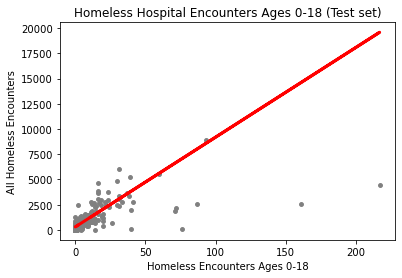

In [59]:
# create a scatter plot that shows the regression line from the model on the test set. 
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Homeless Hospital Encounters Ages 0-18 (Test set)')
plot_test.xlabel('Homeless Encounters Ages 0-18')
plot_test.ylabel('All Homeless Encounters')
plot_test.show()

- Regression Analysis:  This line doesn't match the data very well.  I would not expect a very strong coefficient.  

In [51]:
# create the objects that contain the model summary statistics (slope, mean squared error, and r2)
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Slope:' ,regression.coef_)
print('Mean squared error:', rmse)
print('R2score:',r2)

Slope: [[88.91221627]]
Mean squared error: 2708785.583886588
R2score: -0.6436575389059414


In [52]:
y_predicted

array([[  476.80403977],
       [  387.8918235 ],
       [  298.97960723],
       [  298.97960723],
       [  387.8918235 ],
       [  298.97960723],
       [  298.97960723],
       [  298.97960723],
       [  298.97960723],
       [  476.80403977],
       [  654.6284723 ],
       [  298.97960723],
       [  298.97960723],
       [  298.97960723],
       [  387.8918235 ],
       [  387.8918235 ],
       [  298.97960723],
       [  743.54068857],
       [  921.3651211 ],
       [  387.8918235 ],
       [ 1632.66285124],
       [ 3055.25831151],
       [  743.54068857],
       [  743.54068857],
       [ 1099.18955364],
       [ 3677.64382538],
       [ 1454.8384187 ],
       [  921.3651211 ],
       [ 2343.96058137],
       [ 2966.34609524],
       [ 2610.69723017],
       [  654.6284723 ],
       [ 1899.39950004],
       [  387.8918235 ],
       [  387.8918235 ],
       [  298.97960723],
       [  832.45290484],
       [  387.8918235 ],
       [  476.80403977],
       [  298.97960723],


In [54]:
# create a dataframe comparing the actual and predicted values of y
bonusdata = pd.DataFrame({'Acutal': y_test.flatten(), 'Predicted': y_predicted.flatten()})
bonusdata.head(30)

,Acutal,Predicted
0,272,476.804040
1,378,387.891824
2,13,298.979607
3,70,298.979607
4,30,387.891824
5,34,298.979607
6,16,298.979607
7,88,298.979607
8,32,298.979607
9,152,476.804040


#### Comparing how the regression fits the training set

In [55]:
# compare how the regression fits the training set
y_predicted_train = regression.predict(X_train) # this is predicted the training set

In [57]:
rmse = mean_squared_error (y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)
print('Slope:' ,regression.coef_)
print('Mean squared error:', rmse)
print('R2score:',r2)

Slope: [[88.91221627]]
Mean squared error: 1934501.1579686895
R2score: 0.7150468552112574


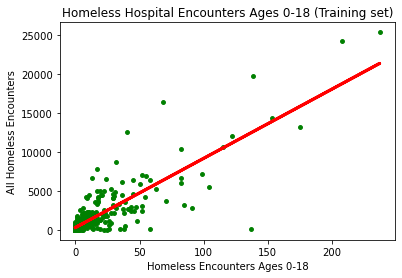

In [60]:
# visualize the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Homeless Hospital Encounters Ages 0-18 (Training set)')
plot_test.xlabel('Homeless Encounters Ages 0-18')
plot_test.ylabel('All Homeless Encounters')
plot_test.show()


- The regression on this training set is not a very strong correlation and doesn't fit the line super well.  Since we had a strong correlation with ages 40-59 and now a low correlation with ages 0-18, this is to be expected as the age group 0-18 had the fewest homeless encounters in the hospitals. 

### Exporting files

In [63]:
df4.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.4_Regression_Homeless_Ages_40-59.csv')
bonus2.to_csv(r'C:\Users\there\Desktop\Achievement 6\02 Data\Prepared Data\6.4_Regression_Homeless_Ages_0-18.csv')